In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Filter_Unmerged.csv').drop(columns = ['Unnamed: 0'])
df.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,Tor%,FTA,...,3PM,FGM,FGA,PTS,MINS,AST,REB,BLK,TOV,STL
0,Alex Abrines,Okc,G,25.69,31,19.0,39.5,12.2,7.9,13,...,41.021,56.021,157,164.3,589.0,18.6,46.5,5.89,13.95,17.05
1,Jaylen Adams,Atl,G,22.93,34,12.6,26.2,13.5,19.7,9,...,25.012,38.008,110,108.8,428.4,64.6,61.2,5.10,27.88,12.92
2,Steven Adams,Okc,C,25.73,80,33.4,69.5,16.4,12.8,292,...,0.000,480.972,809,1112.0,2672.0,128.0,760.0,76.80,138.40,119.20
3,Bam Adebayo,Mia,C,21.73,82,23.3,48.6,15.8,17.1,226,...,3.000,279.948,486,729.8,1910.6,180.4,598.6,64.78,121.36,72.16
4,Deng Adel,Cle,F,22.19,19,10.2,21.3,9.9,13.7,4,...,6.003,11.008,36,32.3,193.8,5.7,19.0,3.99,6.08,0.95


In [15]:
for col in ['PTS', 'AST', 'REB', 'BLK', 'TOV', 'STL']:
    df[col + 'P36'] = df[col] * 36 / df['MINS']
print(list(df.columns))
df.head()

['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'Tor%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG', '2PM', '3PM', 'FGM', 'FGA', 'PTS', 'MINS', 'AST', 'REB', 'BLK', 'TOV', 'STL', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36']


,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,Tor%,FTA,...,REB,BLK,TOV,STL,PTSP36,ASTP36,REBP36,BLKP36,TOVP36,STLP36
0,Alex Abrines,Okc,G,25.69,31,19.0,39.5,12.2,7.9,13,...,46.5,5.89,13.95,17.05,10.042105,1.136842,2.842105,0.360000,0.852632,1.042105
1,Jaylen Adams,Atl,G,22.93,34,12.6,26.2,13.5,19.7,9,...,61.2,5.10,27.88,12.92,9.142857,5.428571,5.142857,0.428571,2.342857,1.085714
2,Steven Adams,Okc,C,25.73,80,33.4,69.5,16.4,12.8,292,...,760.0,76.80,138.40,119.20,14.982036,1.724551,10.239521,1.034731,1.864671,1.605988
3,Bam Adebayo,Mia,C,21.73,82,23.3,48.6,15.8,17.1,226,...,598.6,64.78,121.36,72.16,13.751073,3.399142,11.278970,1.220601,2.286695,1.359657
4,Deng Adel,Cle,F,22.19,19,10.2,21.3,9.9,13.7,4,...,19.0,3.99,6.08,0.95,6.000000,1.058824,3.529412,0.741176,1.129412,0.176471


In [16]:
df['O/DRTG'] = df['ORTG'] / df['DRTG']
df['3/2FGA'] = df['3PA'] / df['2PA']
df['%FTA'] = df['FTA'] / (df['FGA'] + df['FTA'])
df.columns

Index(['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'Tor%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG',
       '2PM', '3PM', 'FGM', 'FGA', 'PTS', 'MINS', 'AST', 'REB', 'BLK', 'TOV',
       'STL', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36',
       'O/DRTG', '3/2FGA', '%FTA'],
      dtype='object')

In [18]:
cols_to_keep = ['USG%', 'Tor%', 'eFG%', 'TS%', 'TRB%', 'AST%', 'PTSP36', 'ASTP36', 'REBP36', 'BLKP36', 'TOVP36', 'STLP36', 'O/DRTG', '3/2FGA', '%FTA']
df[cols_to_keep].isnull().sum().sum()

0

In [19]:
#Use KMeans to cluster players
from sklearn.cluster import KMeans
inertias = []
num_data = df._get_numeric_data().dropna(axis = 1)
for i in range(5, 15):
    test_model = KMeans(n_clusters = i, random_state = 1) #test using just 5 clusters
    test_model.fit(num_data)
    inertias.append(test_model.inertia_)
inertias

[63434087.168615386,
 53933885.47173835,
 48867766.946043834,
 44528764.34458035,
 40798147.74374735,
 38903453.94248304,
 36999144.89576992,
 35133397.4200507,
 33395062.181656443,
 31759693.642404303]

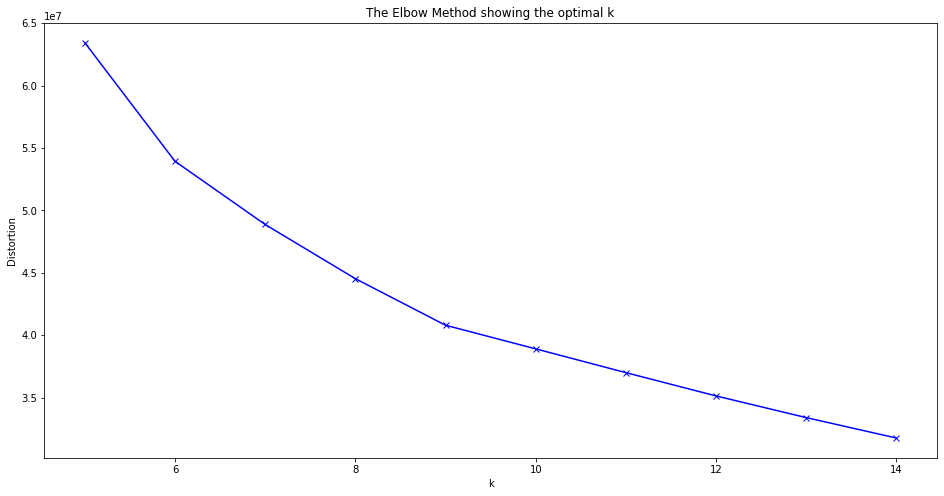

In [20]:
plt.figure(figsize=(16,8))
plt.plot(range(5,15), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
test_model = KMeans(n_clusters = 9, random_state = 1) #test using just 5 clusters
test_model.fit(num_data)
df['Cluster'] = test_model.labels_
df['Cluster'].value_counts()

0    94
2    84
6    72
7    51
1    47
4    40
5    27
3    13
8    12
Name: Cluster, dtype: int64

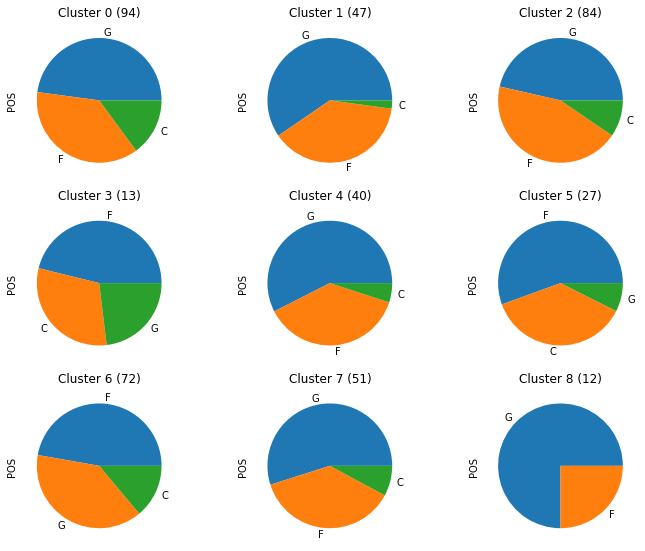

In [38]:
plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title("Cluster " + str(i) + " (" + str(len(df[df['Cluster'] == i])) + ")")
    plt.tight_layout()
    df[df['Cluster'] == i]['POS'].value_counts().plot.pie()  
plt.show()

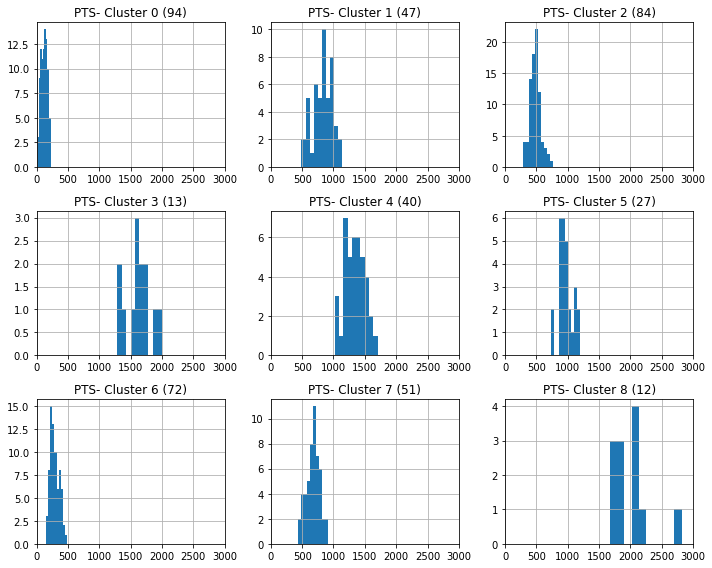

In [41]:
stat = 'PTS'
plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(stat + "- Cluster " + str(i) + " (" + str(len(df[df['Cluster'] == i])) + ")")
    plt.xlim(0, 3000)
    plt.tight_layout()
    df[df['Cluster'] == i][stat].hist()
plt.show()

In [42]:
df[cols_to_keep].corr()

,USG%,Tor%,eFG%,TS%,TRB%,AST%,PTSP36,ASTP36,REBP36,BLKP36,TOVP36,STLP36,O/DRTG,3/2FGA,%FTA
USG%,1.000000,-0.026745,-0.027331,0.092654,0.087351,0.520571,0.936105,0.411460,0.088154,-0.050347,0.711151,0.081813,-0.062588,-0.260982,0.266757
Tor%,-0.026745,1.000000,-0.097436,-0.068409,0.175436,0.433886,-0.157882,0.483929,0.177355,0.044453,0.654604,0.186112,-0.009957,-0.291232,0.241134
eFG%,-0.027331,-0.097436,1.000000,0.958705,0.405118,-0.174942,0.271738,-0.206380,0.407346,0.398188,-0.083212,-0.125322,0.802917,-0.125602,0.294536
TS%,0.092654,-0.068409,0.958705,1.000000,0.411890,-0.091983,0.392450,-0.133988,0.412017,0.372561,0.018171,-0.119138,0.827756,-0.170187,0.458278
TRB%,0.087351,0.175436,0.405118,0.411890,1.000000,-0.205170,0.191017,-0.238448,0.998185,0.598555,0.180873,-0.089528,0.612876,-0.386643,0.503808
AST%,0.520571,0.433886,-0.174942,-0.091983,-0.205170,1.000000,0.386308,0.984572,-0.204226,-0.252195,0.694011,0.308630,-0.101656,-0.201848,0.099185
PTSP36,0.936105,-0.157882,0.271738,0.392450,0.191017,0.386308,1.000000,0.271429,0.194752,0.061311,0.573647,0.014635,0.191521,-0.246473,0.350118
ASTP36,0.411460,0.483929,-0.206380,-0.133988,-0.238448,0.984572,0.271429,1.000000,-0.235791,-0.266001,0.648421,0.320139,-0.119048,-0.180226,0.056208
REBP36,0.088154,0.177355,0.407346,0.412017,0.998185,-0.204226,0.194752,-0.235791,1.000000,0.600022,0.185458,-0.087259,0.613345,-0.386975,0.501394
BLKP36,-0.050347,0.044453,0.398188,0.372561,0.598555,-0.252195,0.061311,-0.266001,0.600022,1.000000,-0.012814,-0.001558,0.557469,-0.216423,0.315323


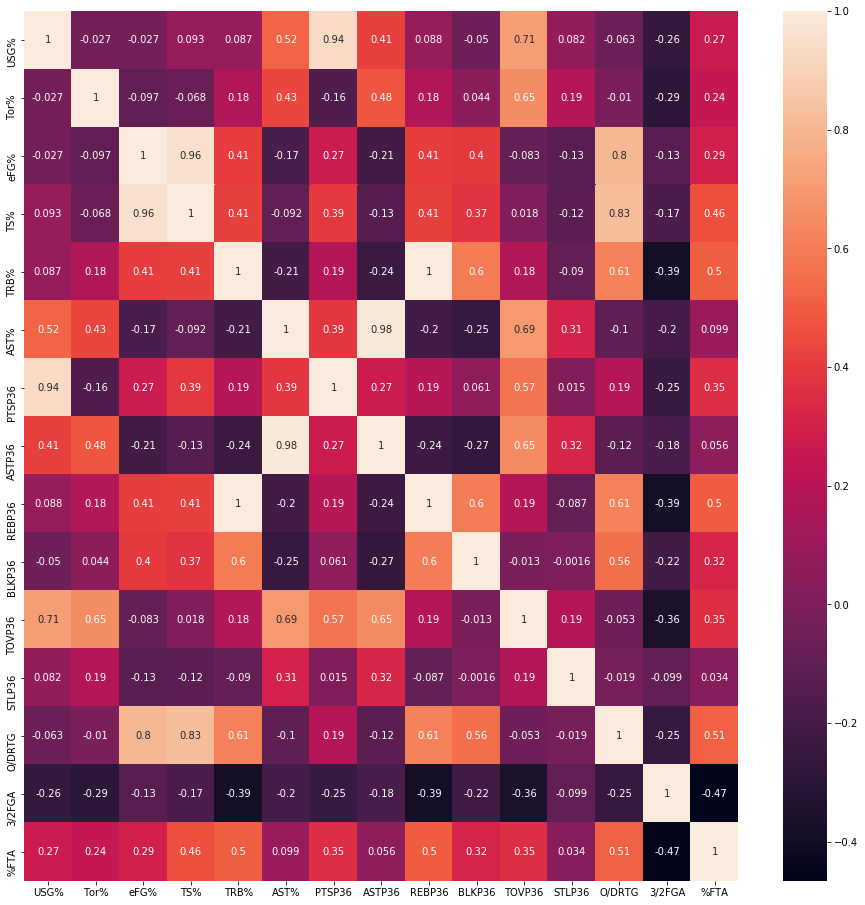

In [47]:
import seaborn as sn
plt.figure(figsize=(16,16))
sn.heatmap(df[cols_to_keep].corr(), annot=True)
plt.show()

In [48]:
df[cols_to_keep].describe()

,USG%,Tor%,eFG%,TS%,TRB%,AST%,PTSP36,ASTP36,REBP36,BLKP36,TOVP36,STLP36,O/DRTG,3/2FGA,%FTA
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,18.785852,12.154455,0.517223,0.548287,10.007776,13.820061,15.337947,3.385311,6.733290,0.764913,1.925235,1.112010,1.055743,0.790635,0.193341
std,5.180464,3.528923,0.058636,0.056510,4.623909,8.536472,4.707338,2.000050,3.116203,0.701144,0.759908,0.421685,0.117123,0.829109,0.073030
min,7.771832,3.700000,0.224800,0.309569,2.800000,1.900000,3.380171,0.564706,1.963636,0.000000,0.400000,0.000000,0.680954,0.000000,0.000000
25%,15.100000,9.700000,0.480936,0.518000,6.460000,7.575000,11.999691,1.862069,4.355428,0.320857,1.350545,0.801799,0.977408,0.337386,0.140104
50%,17.825402,11.700000,0.516168,0.552014,8.800000,11.073377,14.764671,2.730166,5.926346,0.554621,1.797589,1.064018,1.046858,0.614023,0.186958
75%,22.100000,14.200000,0.553921,0.583000,12.700000,18.049760,18.069771,4.581818,8.641840,0.984609,2.334836,1.342849,1.129008,1.076719,0.239867
max,40.500000,26.800000,0.716000,0.720000,26.000000,47.600000,35.315217,10.700000,17.613734,5.337931,4.852174,2.537705,1.444331,10.615385,0.467742


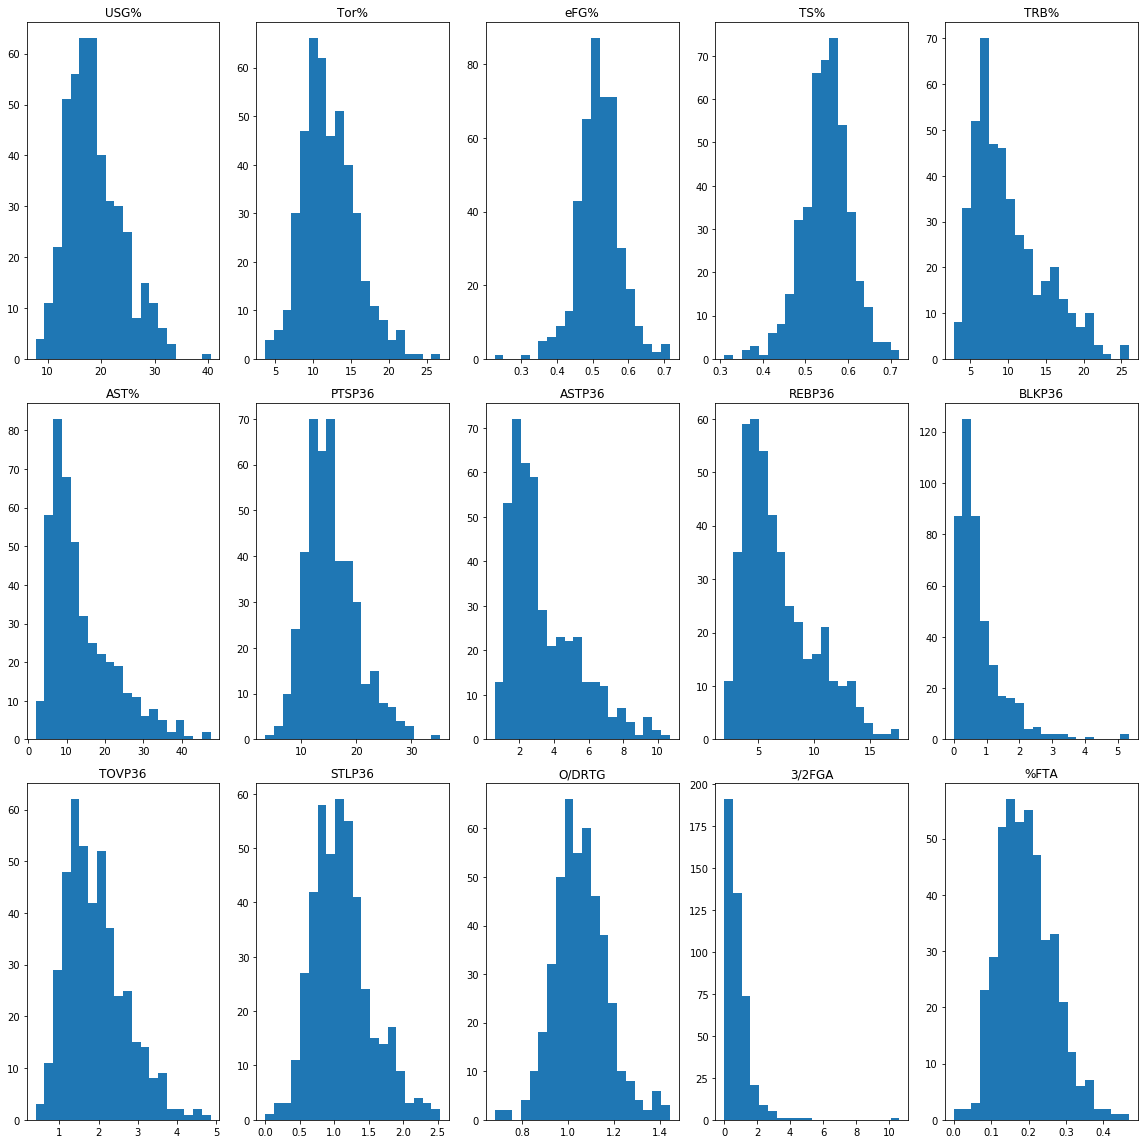

In [51]:
f = plt.subplots(3, 5, figsize=(16, 16))
for i in range(len(cols_to_keep)):
    plt.subplot(3, 5, i+1)
    plt.hist(df[cols_to_keep[i]], bins=20)
    plt.title(cols_to_keep[i])
    plt.tight_layout()
plt.show()

In [49]:
len(cols_to_keep)

15

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[cols_to_keep]), columns=cols_to_keep)
scaled_df